In [1]:
import pandas as pd
import numpy as np
# pip install missingno
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import GridSearchCV

In [2]:
data = pd.read_csv('zoo.csv')

In [3]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
# 查看数据形状
data.shape

(101, 18)

In [5]:
# 查看数据类型分布
data.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [6]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


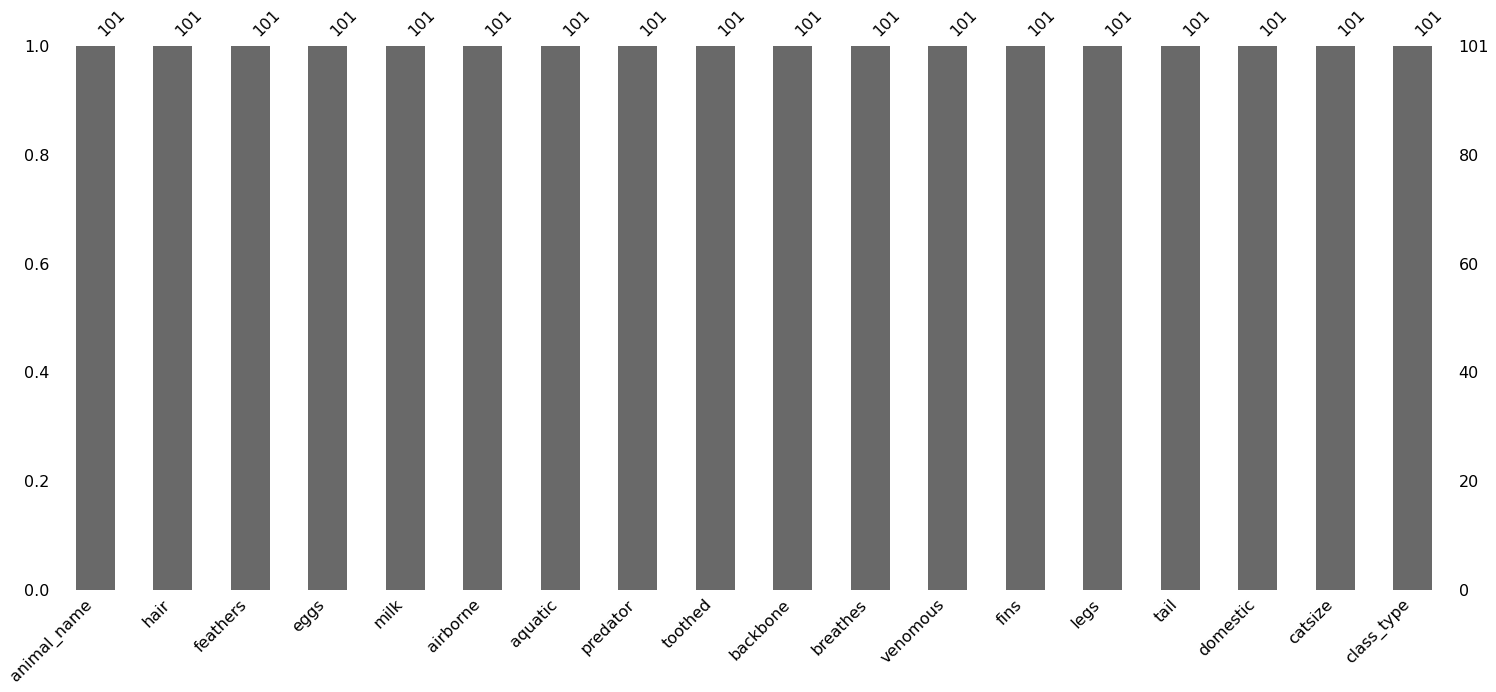

In [7]:
# 查看数据缺失情况
p=msno.bar(data)

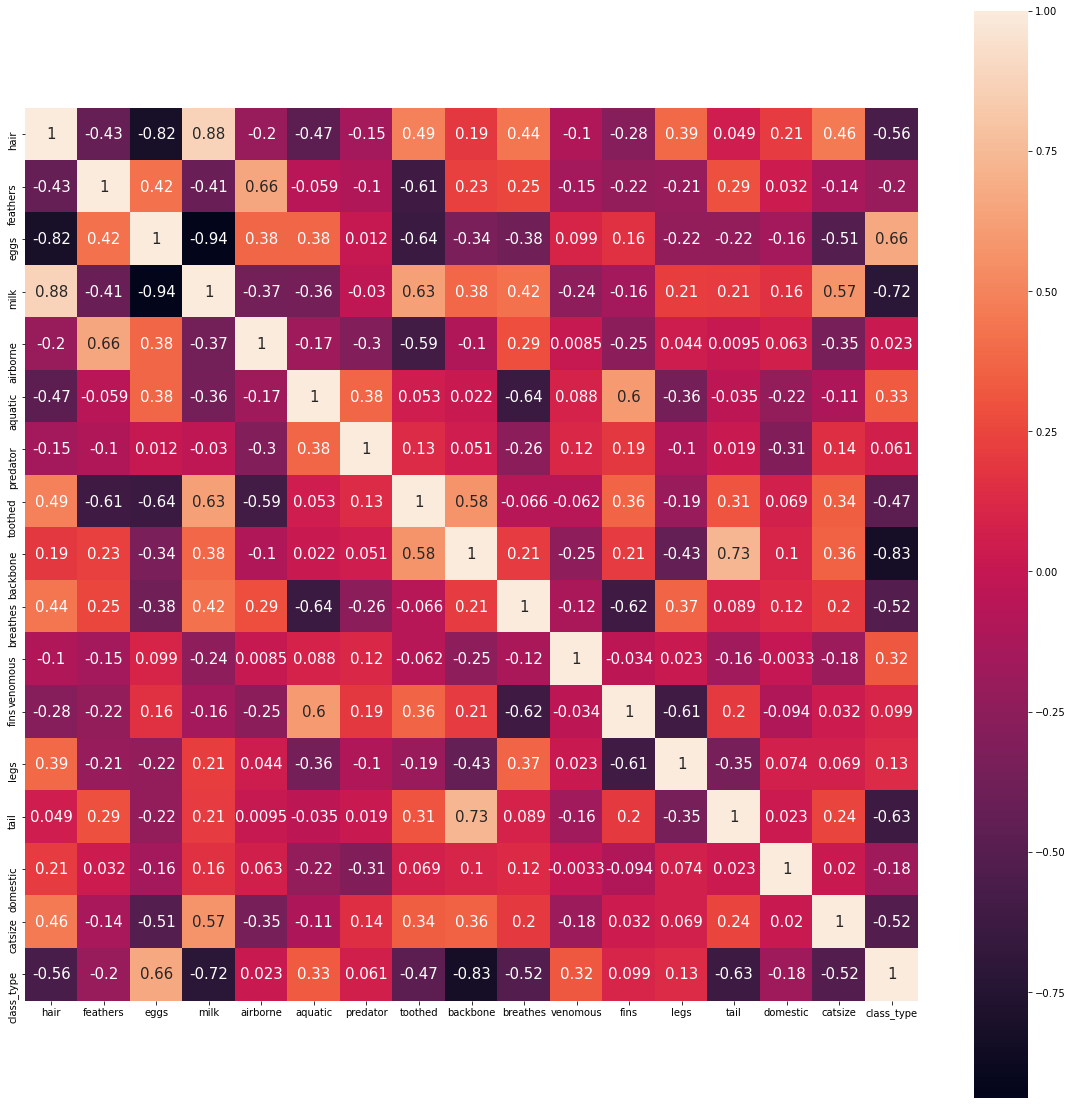

In [8]:
# 画热力图，数值为两个变量之间的相关系数
plt.figure(figsize=(20,20))  
p=sns.heatmap(data.corr(), annot=True, annot_kws = { 'fontsize' : 15 },square=True) 

In [9]:
# 查看类别分布
pd.value_counts(data["class_type"]) 

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [10]:
# 获取训练数据和标签
x_data  = data.drop(['animal_name', 'class_type'], axis=1)
y_data = data['class_type']

In [11]:
from sklearn.model_selection import train_test_split
# 切分数据集，stratify=y表示切分后训练集和测试集中的数据类型的比例跟切分前y中的比例一致
# 比如切分前y中0和1的比例为1:2，切分后y_train和y_test中0和1的比例也都是1:2
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.3, stratify=y_data)

In [12]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
tree.score(x_test, y_test)

0.9354838709677419

模型优化

In [16]:
param_grid = {'max_depth': [5,10,15,20,25],
                    'min_samples_split': [2,3,4,5,6],
                    'min_samples_leaf':[1,2,3,4]}
model = GridSearchCV(DecisionTreeClassifier(),  param_grid, cv=3, iid=True)
model.fit(x_train, y_train)
print(model.best_estimator_)

TypeError: __init__() got an unexpected keyword argument 'iid'